In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data & Pre Process


In [ ]:
#Reading The Data File
PATH_TO_DATA = '/content/drive/MyDrive/Colab Notebooks/house prices.csv'
df = pd.read_csv(PATH_TO_DATA)

n1,n2=df.shape
df=df.dropna(thresh=0.7*n1,axis='columns') # Keep only the columns with at least 0.7*n1 non-NA values.
df=df.dropna(thresh=0.9*n2) # Keep only the rows with at least 0.7*n1 non-NA values.
#For Object columns
cat_columns = df.select_dtypes(['O']).columns
for cat in cat_columns: 
  df[cat] = df[cat].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df=df.fillna(df.mean())
#For numeric columns
df=df.fillna(df.mean())
cat1_columns = df.select_dtypes(['int64']).columns
for cat1 in cat1_columns: 
  df[cat1] = df[cat1].astype('float64')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,11,13,1,196.0,2,3,2,2,3,3,2,706.0,5,0.0,150.0,856.0,0,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,7,8,2,0.0,3,3,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,0,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,11,13,1,162.0,2,3,2,2,3,2,2,486.0,5,0.0,434.0,920.0,0,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,12,15,2,0.0,3,3,0,3,1,3,0,216.0,5,0.0,540.0,756.0,0,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,11,13,1,350.0,2,3,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,0,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3,62.0,7917.0,1,3,3,0,4,0,8,2,2,0,5,6.0,5.0,1999.0,2000.0,1,1,11,13,2,0.0,3,3,2,2,3,3,5,0.0,5,0.0,953.0,953.0,0,0,1,4,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3,7.0,6,1.0,1,1999.0,1,2.0,460.0,4,4,2,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4,175000.0
1456,1457.0,20.0,3,85.0,13175.0,1,3,3,0,4,0,14,2,2,0,2,6.0,6.0,1978.0,1988.0,1,1,8,10,3,119.0,3,3,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,0,4,1,4,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3,7.0,2,2.0,1,1978.0,2,2.0,500.0,4,4,2,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4,210000.0
1457,1458.0,70.0,3,66.0,9042.0,1,3,3,0,4,0,6,2,2,0,5,7.0,9.0,1941.0,2006.0,1,1,4,5,2,0.0,0,2,3,3,1,3,2,275.0,5,0.0,877.0,1152.0,0,0,1,4,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2,9.0,6,2.0,1,1941.0,1,1.0,252.0,4,4,2,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4,266500.0
1458,1459.0,20.0,3,68.0,9717.0,1,3,3,0,4,0,12,2,2,0,2,5.0,6.0,1950.0,1996.0,3,1,7,8,2,0.0,3,3,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,0,2,1,0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,2,5.0,6,0.0,1,1950.0,2,1.0,240.0,4,4,2,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4,142125.0


# Test And Train Spliting & Normalising

In [ ]:
Data=df.values
y=Data[:,-1]
X=Data[:,:-1]
#Spliting the Data to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#Normalising The data
xScaler = MinMaxScaler().fit(X);        #This has changed
yScaler = MinMaxScaler().fit(y.reshape(-1, 1));   #This has changed
X_train = xScaler.transform(X_train)
X_test  = xScaler.transform(X_test)
y_train = yScaler.transform(y_train.reshape(-1, 1))
y_test  = yScaler.transform(y_test.reshape(-1, 1))

# Create Model

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Dropout
from keras import layers

(dim1,dim2)=X_train.shape
#Model Creation
model = Sequential()
model.add(layers.Dense(dim2, activation='relu', input_shape=(dim2,)))	#Hidden Layer 1
model.add(layers.Dropout(.3))
model.add(layers.Dense(512, activation='relu'))	#Hidden Layer 2
model.add(layers.Dropout(.3))
#model.add(layers.Dense(256, activation='relu'))	#Hidden Layer 3
model.add(layers.Dense(1, activation='linear')) #Last layer with one output
model.summary()

# Configure the Network
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
opt='adam'
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae']) #change loss='mae'

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 75)                5700      
_________________________________________________________________
dropout_16 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               38912     
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 513       
Total params: 45,125
Trainable params: 45,125
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
36/36 [==============================] - 1s 7ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2189 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0951
Epoch 2/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0942 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0496
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0748 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0634
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0696 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0551
Epoch 5/30
36/36 [==============================] - 0s 4ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0609 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0481
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0548 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0396
Epoch 7/30
36/36 [==========

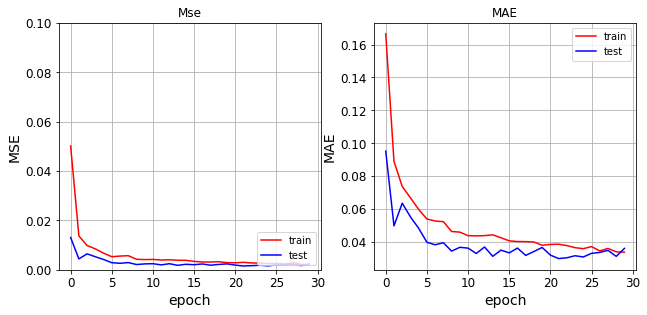

In [ ]:
# history = model.fit(X_train, y_train, epochs=15, batch_size=20, validation_split=0.2)
history = model.fit(X_train, y_train, epochs=30 , validation_data=(X_test , y_test),batch_size=30)   #this has changed
 
 
# Plotting Metrics
# Plot the Accuracy Curves
#MSe

plt.figure(figsize=(16, 10))
plt.subplot(231)
plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.ylim([0, 0.1])
plt.title('Mse')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
#MAe
plt.subplot(232)
plt.plot(history.history['mae'],'r')
plt.plot(history.history['val_mae'],'b')
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()

# Evaluation


9/9 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0359


[0.002334807999432087, 0.002334807999432087, 0.035883959382772446]

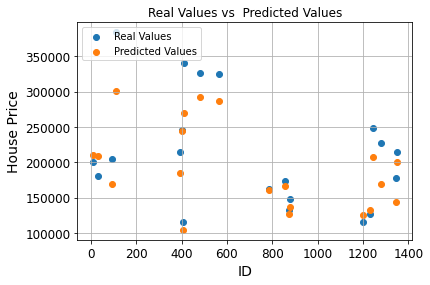

In [ ]:
# Prediction Labels
y_pred=model.predict(X_test)   #This has changed
yPredict=yScaler.inverse_transform(y_pred).reshape(-1, 1)
yTest=yScaler.inverse_transform(y_test)
yTest=yTest.reshape(-1, 1)
XTest=xScaler.inverse_transform(X_test)

Real_test=np.concatenate((XTest[:,0].reshape(-1, 1),yTest,yPredict),axis=1)
#Real_test=Real_test[Real_test[:,0].argsort()]
number_of_rows=20
size1=20
random_indices = np.random.choice(number_of_rows, size1, replace=False)
final=Real_test[random_indices,:]
final=final[final[:,0].argsort()]

# Plot the  test
fig = plt.figure()
# plt.plot(final[:,0],final[:,1],'r')
# plt.plot(final[:,0],final[:,2],'b-')
plt.scatter(final[:,0],final[:,1])
plt.scatter(final[:,0],final[:,2])
plt.title('Real Values vs  Predicted Values')
plt.ylabel('House Price')
plt.xlabel('ID')
plt.legend(['Real Values', 'Predicted Values'], loc='upper left')
plt.grid()


#Evaluation
model.evaluate(X_test, y_test) 